In [1]:
#standard ds imports
import pandas as pd
import numpy as np

#viz and stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

###
# inside acquire.py script:
from env import uname, pwd, host
import env
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle
from sklearn.model_selection import train_test_split
from scipy import stats
import sklearn.preprocessing

In [2]:
train,validate,test = wrangle.wrangle_zillow()
train.head()

,beds,baths,sqft,taxable_value,built,tax,fips
1941838,4,3,2015,209197,1941,2337,6037
1421974,4,2,1303,285279,1960,3029,6111
1346162,3,2,2128,374480,1950,4668,6111
1492536,2,2,1626,243656,1951,3211,6037
349555,3,2,1406,313183,1950,3879,6037


In [3]:
cols = train.drop(columns=['fips','built']).columns.to_list()
train = wrangle.remove_outliers(train,cols)
train.shape

<class 'numpy.float64'>
1.5
<class 'numpy.float64'>
0.5
<class 'numpy.float64'>
-167.0
<class 'numpy.float64'>
-328980.25
<class 'numpy.float64'>
1908.5
<class 'numpy.float64'>
-3266.5
<class 'numpy.float64'>
6004.0


(976653, 7)

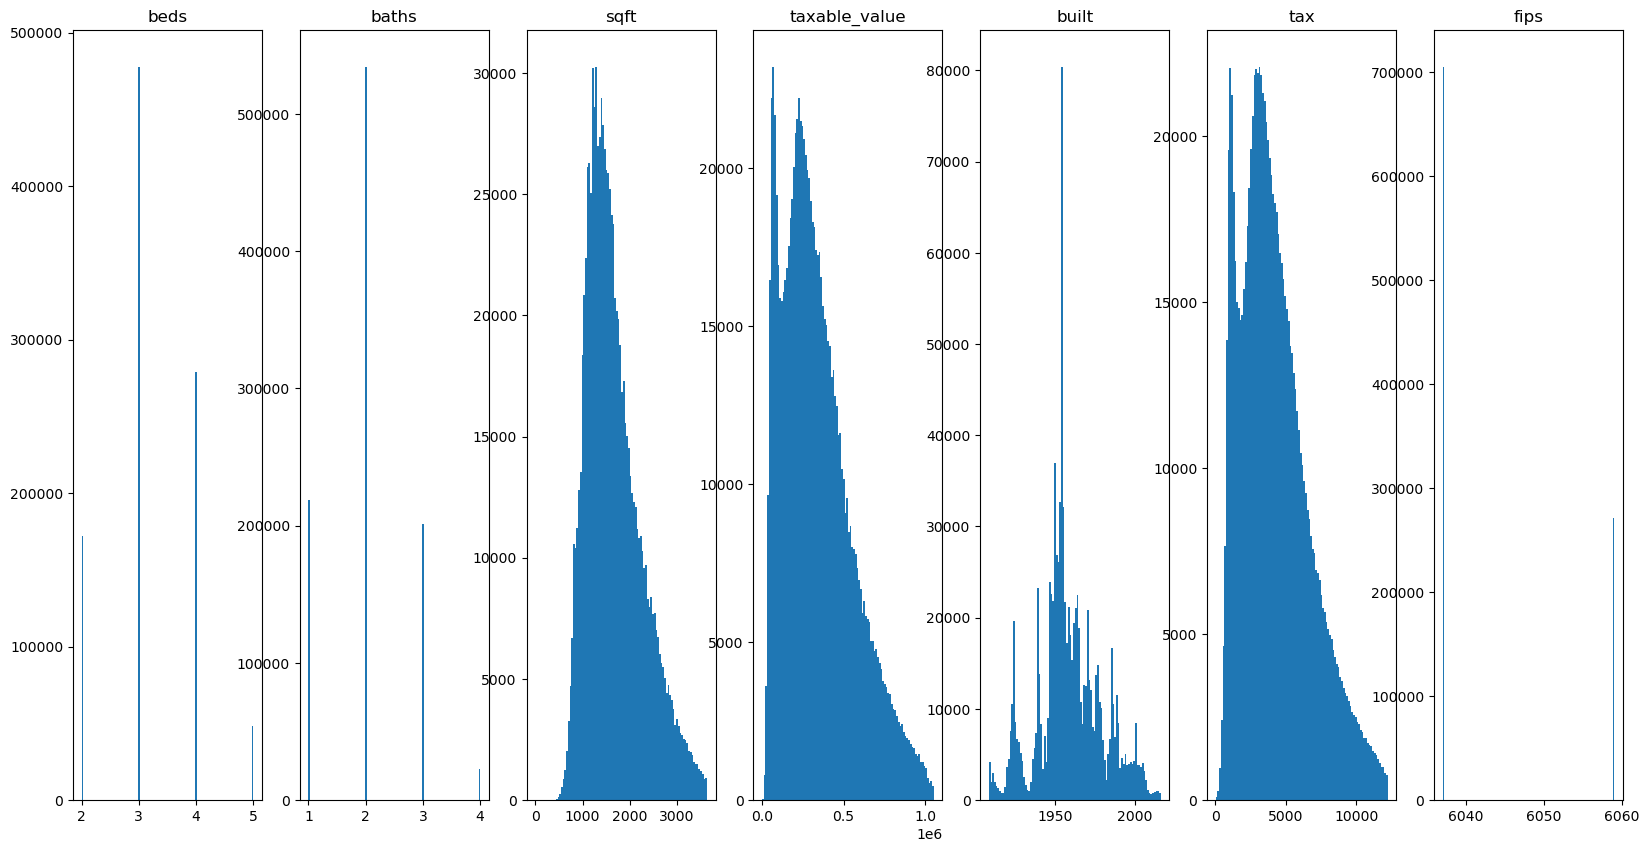

In [4]:
plt.figure(figsize=(20, 10))

# List of columns
cols = train.columns.to_list()
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,7,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    train[col].hist(bins=100)
    # Hide gridlines.
    plt.grid(False)

In [5]:
train_10_000 = train.sample(10_000)

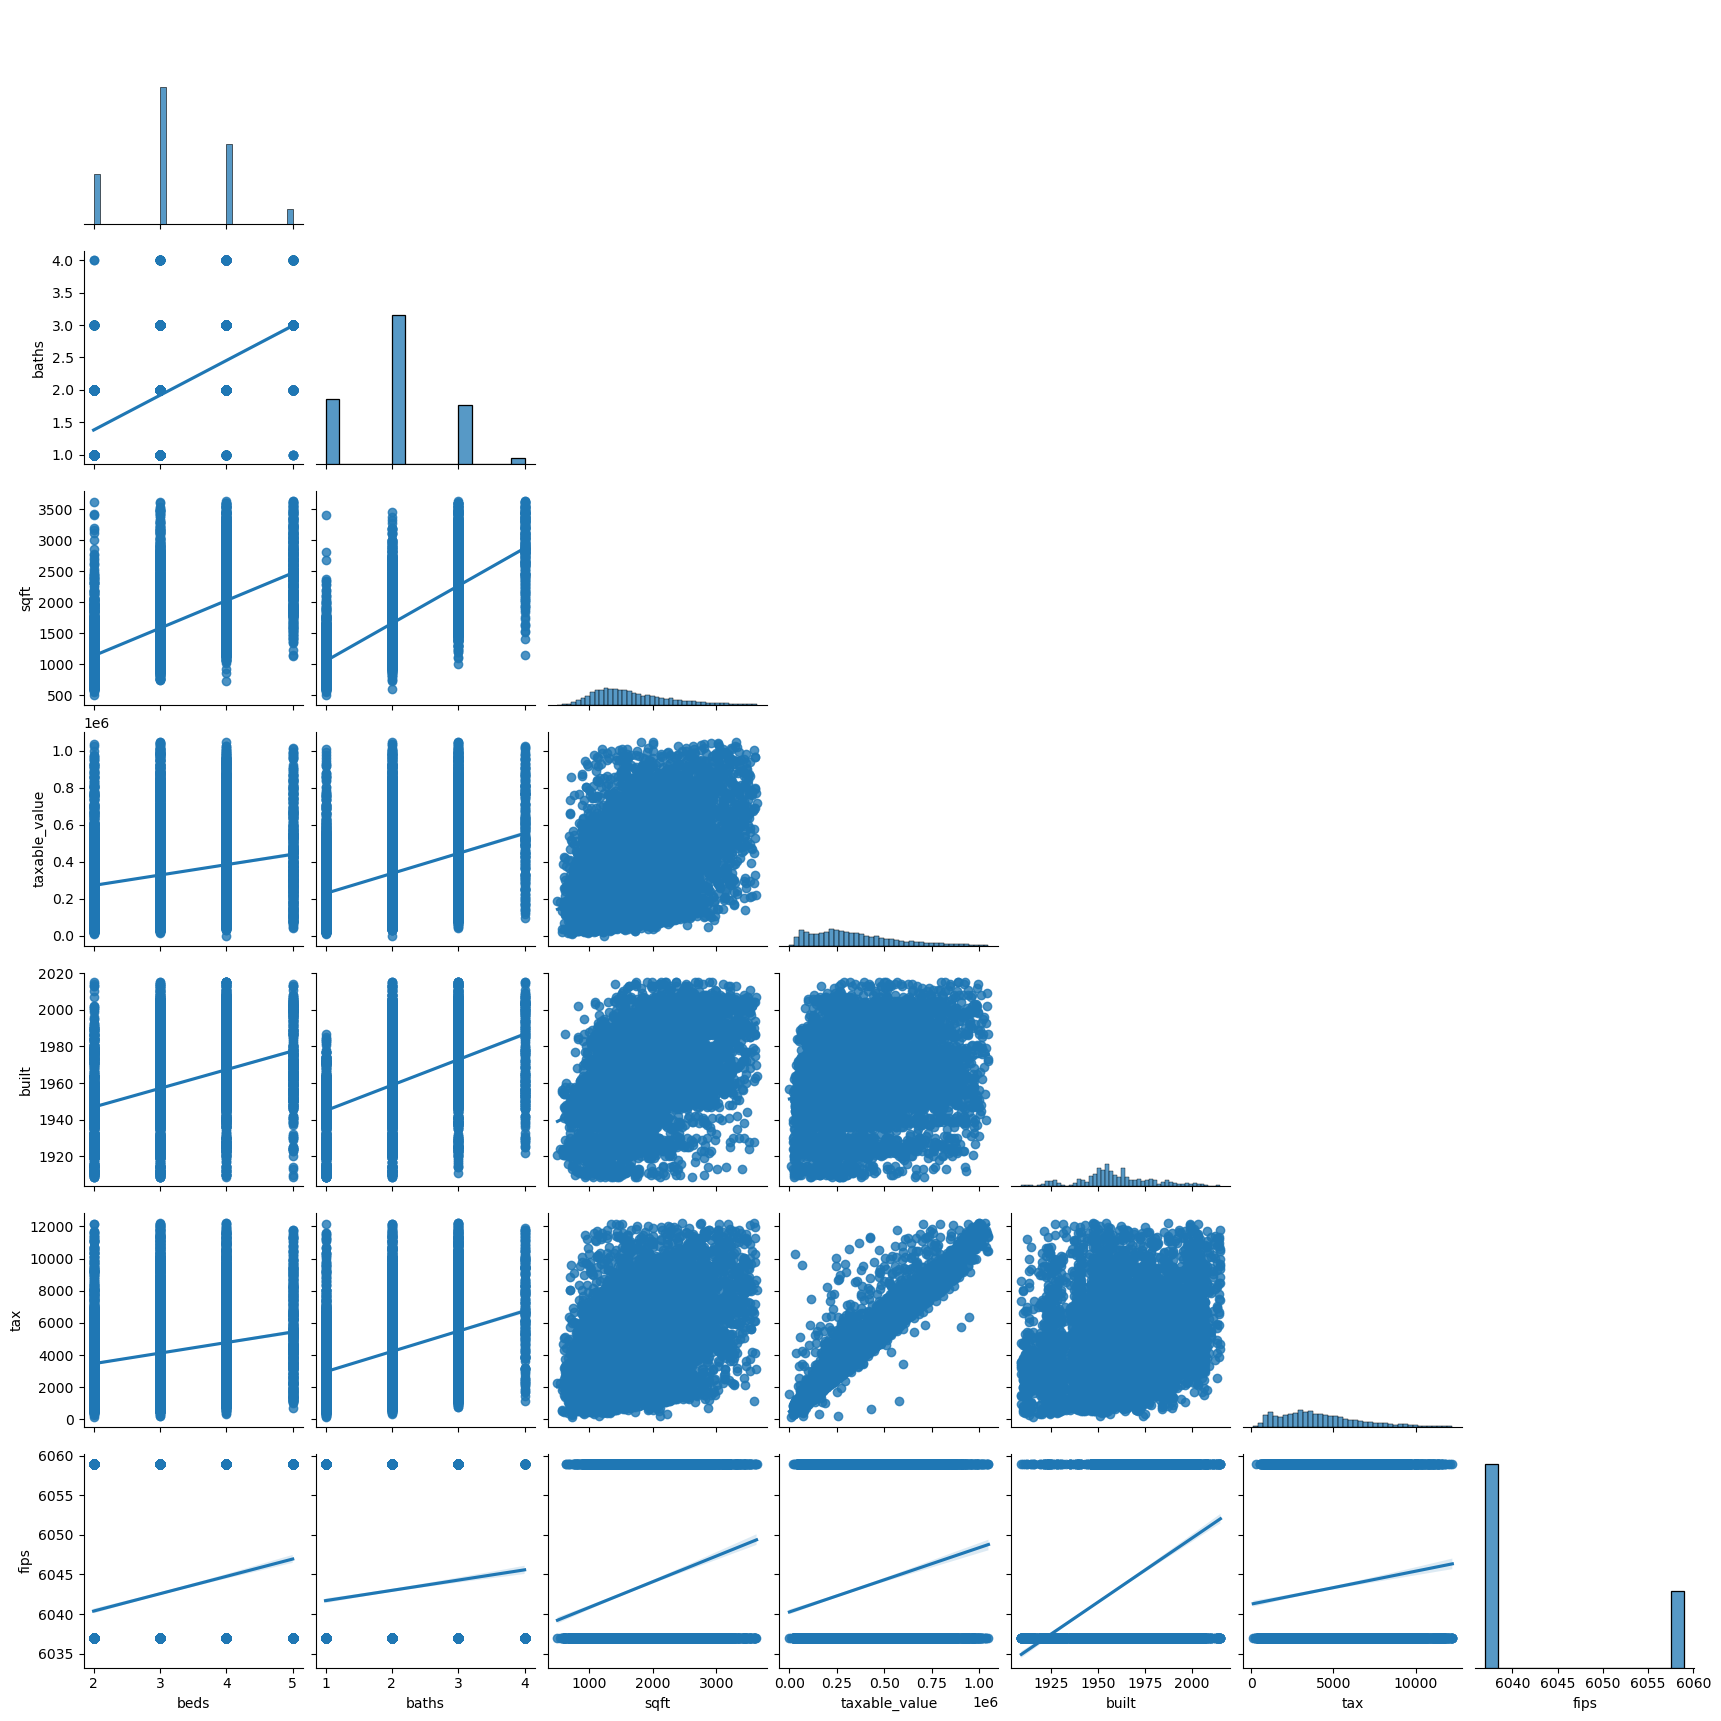

In [6]:
sns.pairplot(train_10_000, corner=True,kind='reg')
plt.show()

In [7]:
#4 Write a function for pairwise plots
def plot_variable_pairs(df):
    sns.pairplot(df,corner=True,kind='reg')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft'>

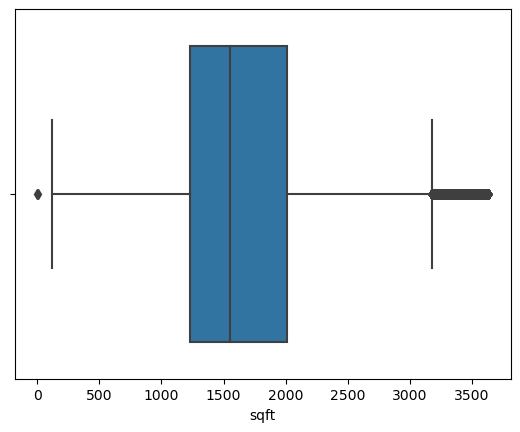

In [8]:
# train['sqft'].hist(grid=False, bins=50)
#sns.displot(train['sqft'])
sns.boxplot(train['sqft'])


/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fips', ylabel='count'>

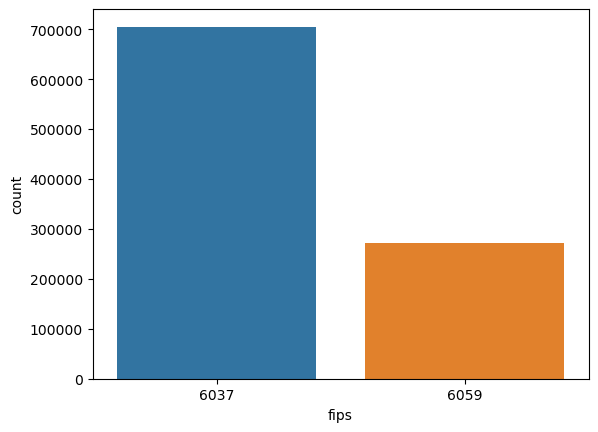

In [9]:
sns.countplot(train['fips']) # 37 is la cnty, 59 is orange cnty, 111 is ventura cnty VERY IMBALANCE

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976653 entries, 1941838 to 2079094
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   beds           976653 non-null  int64
 1   baths          976653 non-null  int64
 2   sqft           976653 non-null  int64
 3   taxable_value  976653 non-null  int64
 4   built          976653 non-null  int64
 5   tax            976653 non-null  int64
 6   fips           976653 non-null  int64
dtypes: int64(7)
memory usage: 59.6 MB


In [11]:
train.beds.nunique(),train.baths.nunique(),train.fips.nunique()

(4, 4, 2)

In [ ]:
# # Separate Cats from Nums
# cat_cols,num_cols = [],[]
# for col in train.columns:
#     if train_iris[col].nunique() < 20:
#             cat_cols.append(col)
#         else:
#             num_cols.append(col)

In [12]:
# (train.drop(columns='student_id')
train.columns.to_list()

['beds', 'baths', 'sqft', 'taxable_value', 'built', 'tax', 'fips']

In [13]:
cat_cols = train.drop(columns=['sqft','taxable_value','built','tax']).columns.to_list()
cat_cols

['beds', 'baths', 'fips']

In [14]:
# 5 Write a function for plotting discrete and continuous variables via 3 different plots
def plot_categorical_and_continuous_vars(train):
    cat_cols = train.drop(columns=['sqft','taxable_value','built','tax']).columns.to_list()
    num_cols = train.drop(columns=['beds','baths','fips']).columns.to_list()
    
    for col in cat_cols:
        sns.countplot(data=train,x=col)
        plt.show()
        print('============')
    
    for col in num_cols:
        sns.histplot(data=train, x=col)
        plt.show()
        sns.boxplot(data=train, x=col)
        plt.show()
        print('============')
    

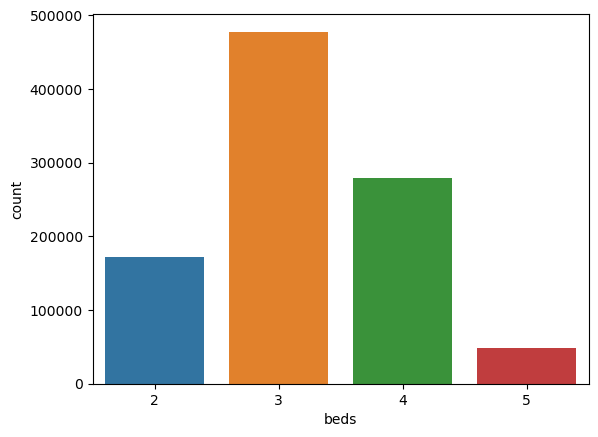

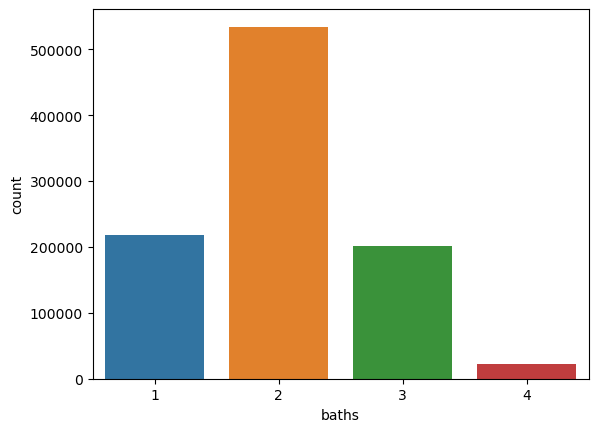

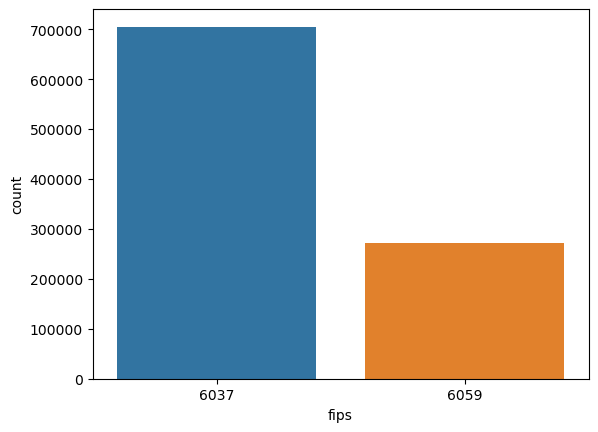

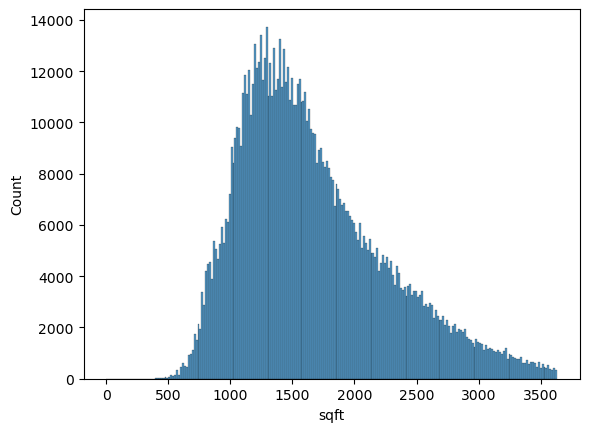

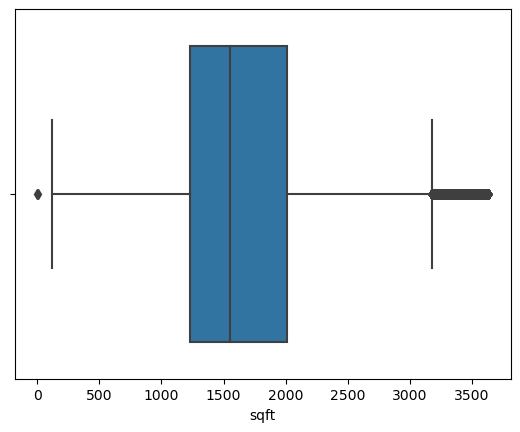

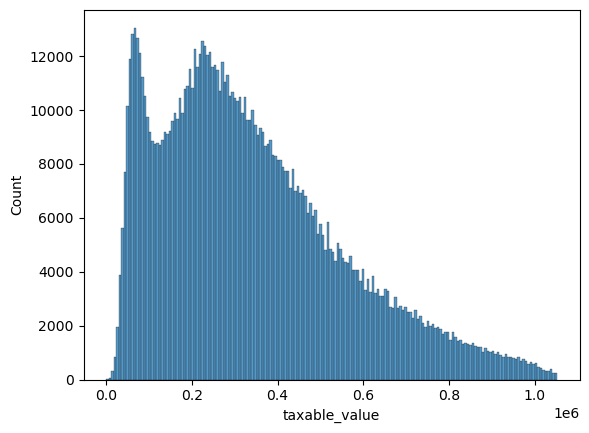

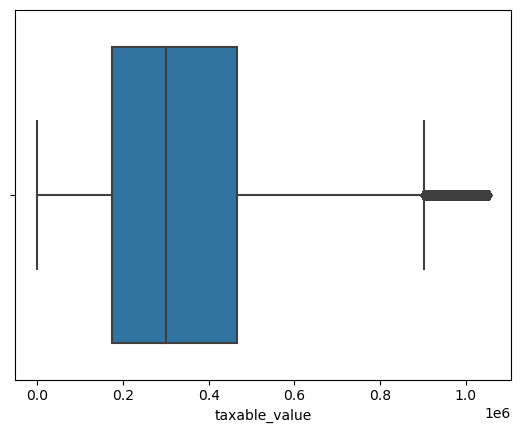

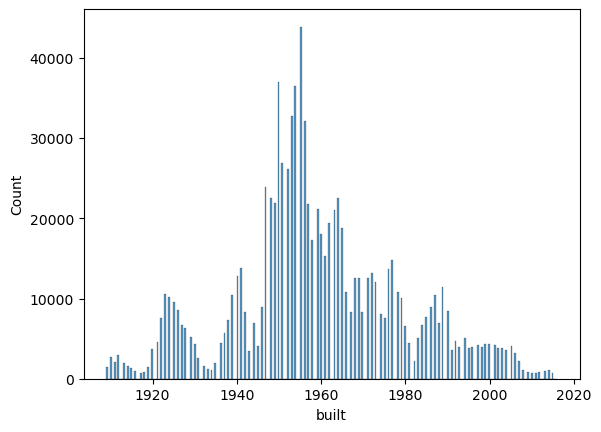

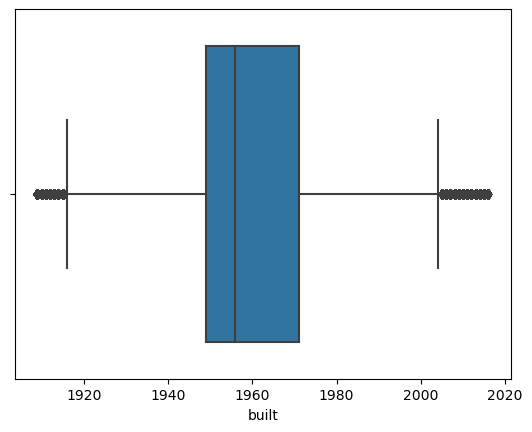

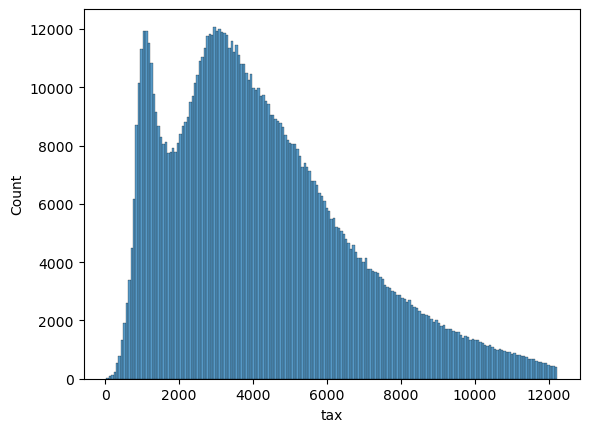

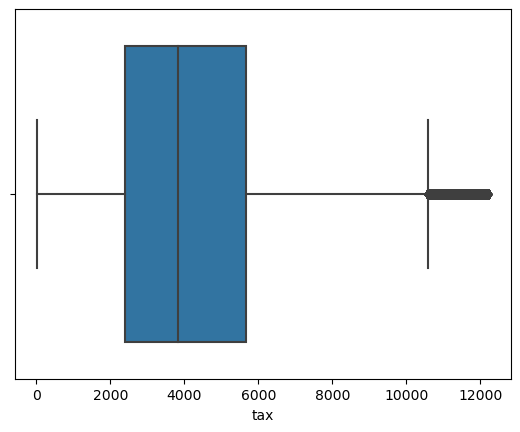

In [15]:
plot_categorical_and_continuous_vars(train)